In [350]:
import pandas as pd

**Reading the dataset**

In [351]:
training_dataset = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')
testing_dataset = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv')

In [352]:
training_dataset

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [353]:
testing_dataset

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [354]:
#defining the names of columns
column_names= ['id','entity','sentiment','tweet']

In [355]:
#rereading the csv files using the specified column names and ensuring the first
#entry is not used as column name
training_dataset = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv',header=None, names=column_names)
testing_dataset = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv',header=None, names=column_names)

In [356]:
training_dataset

,id,entity,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [357]:
testing_dataset

,id,entity,sentiment,tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


**Data preprocessing**

In [358]:
#dropping id column as it is not relevant
training_dataset = training_dataset.drop('id', axis=1)
testing_dataset = testing_dataset.drop('id', axis=1)

In [359]:
training_dataset

,entity,sentiment,tweet
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
74677,Nvidia,Positive,Just realized that the Windows partition of my...
74678,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,Nvidia,Positive,Just realized between the windows partition of...


In [360]:
testing_dataset

,entity,sentiment,tweet
0,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...
995,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [361]:
#dropping entity column as it serves no purpose. The sentiment of the weet is 
#already available in the sentiment column
training_dataset = training_dataset.drop('entity', axis=1)
testing_dataset = testing_dataset.drop('entity', axis=1)

In [362]:
training_dataset

,sentiment,tweet
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


In [363]:
testing_dataset

,sentiment,tweet
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [364]:
#swapping sentiment and tweet columns
cols = list(training_dataset.columns)
i, j = cols.index('sentiment'), cols.index('tweet')
cols[i], cols[j] = cols[j], cols[i]
training_dataset = training_dataset[cols]

cols = list(testing_dataset.columns)
i, j = cols.index('sentiment'), cols.index('tweet')
cols[i], cols[j] = cols[j], cols[i]
testing_dataset = testing_dataset[cols]

In [365]:
training_dataset

,tweet,sentiment
0,im getting on borderlands and i will murder yo...,Positive
1,I am coming to the borders and I will kill you...,Positive
2,im getting on borderlands and i will kill you ...,Positive
3,im coming on borderlands and i will murder you...,Positive
4,im getting on borderlands 2 and i will murder ...,Positive
...,...,...
74677,Just realized that the Windows partition of my...,Positive
74678,Just realized that my Mac window partition is ...,Positive
74679,Just realized the windows partition of my Mac ...,Positive
74680,Just realized between the windows partition of...,Positive


In [366]:
testing_dataset

,tweet,sentiment
0,I mentioned on Facebook that I was struggling ...,Irrelevant
1,BBC News - Amazon boss Jeff Bezos rejects clai...,Neutral
2,@Microsoft Why do I pay for WORD when it funct...,Negative
3,"CSGO matchmaking is so full of closet hacking,...",Negative
4,Now the President is slapping Americans in the...,Neutral
...,...,...
995,⭐️ Toronto is the arts and culture capital of ...,Irrelevant
996,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,Irrelevant
997,Today sucked so it’s time to drink wine n play...,Positive
998,Bought a fraction of Microsoft today. Small wins.,Positive


In [367]:
#converting entries in sentiment column to lowercase
training_dataset['sentiment'] = training_dataset['sentiment'].str.lower()
testing_dataset['sentiment'] = testing_dataset['sentiment'].str.lower()

In [368]:
training_dataset

,tweet,sentiment
0,im getting on borderlands and i will murder yo...,positive
1,I am coming to the borders and I will kill you...,positive
2,im getting on borderlands and i will kill you ...,positive
3,im coming on borderlands and i will murder you...,positive
4,im getting on borderlands 2 and i will murder ...,positive
...,...,...
74677,Just realized that the Windows partition of my...,positive
74678,Just realized that my Mac window partition is ...,positive
74679,Just realized the windows partition of my Mac ...,positive
74680,Just realized between the windows partition of...,positive


In [369]:
testing_dataset

,tweet,sentiment
0,I mentioned on Facebook that I was struggling ...,irrelevant
1,BBC News - Amazon boss Jeff Bezos rejects clai...,neutral
2,@Microsoft Why do I pay for WORD when it funct...,negative
3,"CSGO matchmaking is so full of closet hacking,...",negative
4,Now the President is slapping Americans in the...,neutral
...,...,...
995,⭐️ Toronto is the arts and culture capital of ...,irrelevant
996,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,irrelevant
997,Today sucked so it’s time to drink wine n play...,positive
998,Bought a fraction of Microsoft today. Small wins.,positive


In [370]:
#changing irrelevant entries to neutral
training_dataset['sentiment'] = training_dataset['sentiment'].replace('irrelevant', 'neutral')
testing_dataset['sentiment'] = testing_dataset['sentiment'].replace('irrelevant', 'neutral')

In [371]:
training_dataset

,tweet,sentiment
0,im getting on borderlands and i will murder yo...,positive
1,I am coming to the borders and I will kill you...,positive
2,im getting on borderlands and i will kill you ...,positive
3,im coming on borderlands and i will murder you...,positive
4,im getting on borderlands 2 and i will murder ...,positive
...,...,...
74677,Just realized that the Windows partition of my...,positive
74678,Just realized that my Mac window partition is ...,positive
74679,Just realized the windows partition of my Mac ...,positive
74680,Just realized between the windows partition of...,positive


In [372]:
testing_dataset

,tweet,sentiment
0,I mentioned on Facebook that I was struggling ...,neutral
1,BBC News - Amazon boss Jeff Bezos rejects clai...,neutral
2,@Microsoft Why do I pay for WORD when it funct...,negative
3,"CSGO matchmaking is so full of closet hacking,...",negative
4,Now the President is slapping Americans in the...,neutral
...,...,...
995,⭐️ Toronto is the arts and culture capital of ...,neutral
996,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,neutral
997,Today sucked so it’s time to drink wine n play...,positive
998,Bought a fraction of Microsoft today. Small wins.,positive


In [373]:
#checking for missing entries in training dataset
training_dataset.isnull().sum()

tweet        686
sentiment      0
dtype: int64

In [374]:
#checking for missing entries in testing dataset
testing_dataset.isnull().sum()

tweet        0
sentiment    0
dtype: int64

In [375]:
len(training_dataset)

74682

In [376]:
#dropping rows in training datset which are null since only 686 entries
#out of 74,682 entries are null
training_dataset = training_dataset.dropna(subset=['tweet']) 

In [377]:
training_dataset.isnull().sum()

tweet        0
sentiment    0
dtype: int64

In [378]:
#checking if any tweet in training datset is an empty string
(training_dataset['tweet'].str.strip() == '').sum()

172

In [379]:
#checking if any tweet in testing datset is an empty string
(testing_dataset['tweet'].str.strip() == '').sum()

0

In [380]:
#dropping entries from training dataset which have empty tweet
training_dataset = training_dataset[training_dataset['tweet'].str.strip() != '']

In [381]:
(training_dataset['tweet'].str.strip() == '').sum()

0

In [382]:
#converting tweets to lowercase
training_dataset['tweet'] = training_dataset['tweet'].str.lower()
testing_dataset['tweet'] = testing_dataset['tweet'].str.lower()

In [383]:
training_dataset

,tweet,sentiment
0,im getting on borderlands and i will murder yo...,positive
1,i am coming to the borders and i will kill you...,positive
2,im getting on borderlands and i will kill you ...,positive
3,im coming on borderlands and i will murder you...,positive
4,im getting on borderlands 2 and i will murder ...,positive
...,...,...
74677,just realized that the windows partition of my...,positive
74678,just realized that my mac window partition is ...,positive
74679,just realized the windows partition of my mac ...,positive
74680,just realized between the windows partition of...,positive


In [384]:
testing_dataset

,tweet,sentiment
0,i mentioned on facebook that i was struggling ...,neutral
1,bbc news - amazon boss jeff bezos rejects clai...,neutral
2,@microsoft why do i pay for word when it funct...,negative
3,"csgo matchmaking is so full of closet hacking,...",negative
4,now the president is slapping americans in the...,neutral
...,...,...
995,⭐️ toronto is the arts and culture capital of ...,neutral
996,this is actually a good move tot bring more vi...,neutral
997,today sucked so it’s time to drink wine n play...,positive
998,bought a fraction of microsoft today. small wins.,positive


In [385]:
#removing hashtags from tweets
training_dataset['tweet'] = training_dataset['tweet'].str.replace(r'#\w+', '', regex=True).str.strip()
testing_dataset['tweet'] = testing_dataset['tweet'].str.replace(r'#\w+', '', regex=True).str.strip()

In [386]:
#removing emojis from tweets
import re

emoji_pattern = re.compile(
    "["
    u"\U0001F600-\U0001F64F"  # Emoticons
    u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # Transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # Flags
    u"\U00002500-\U00002BEF"  # Misc symbols
    u"\U00002700-\U000027BF"  # Dingbats
    u"\U0001F900-\U0001F9FF"  # Supplemental symbols
    u"\U00002600-\U000026FF"  # Misc symbols
    "]+", flags=re.UNICODE)

training_dataset['tweet'] = training_dataset['tweet'].apply(lambda x: emoji_pattern.sub(r'', x)).str.strip()
testing_dataset['tweet'] = testing_dataset['tweet'].apply(lambda x: emoji_pattern.sub(r'', x)).str.strip()

In [387]:
training_dataset

,tweet,sentiment
0,im getting on borderlands and i will murder yo...,positive
1,i am coming to the borders and i will kill you...,positive
2,im getting on borderlands and i will kill you ...,positive
3,im coming on borderlands and i will murder you...,positive
4,im getting on borderlands 2 and i will murder ...,positive
...,...,...
74677,just realized that the windows partition of my...,positive
74678,just realized that my mac window partition is ...,positive
74679,just realized the windows partition of my mac ...,positive
74680,just realized between the windows partition of...,positive


In [388]:
testing_dataset

,tweet,sentiment
0,i mentioned on facebook that i was struggling ...,neutral
1,bbc news - amazon boss jeff bezos rejects clai...,neutral
2,@microsoft why do i pay for word when it funct...,negative
3,"csgo matchmaking is so full of closet hacking,...",negative
4,now the president is slapping americans in the...,neutral
...,...,...
995,️ toronto is the arts and culture capital of c...,neutral
996,this is actually a good move tot bring more vi...,neutral
997,today sucked so it’s time to drink wine n play...,positive
998,bought a fraction of microsoft today. small wins.,positive


In [389]:
#removing url from tweets
training_dataset['tweet'] = training_dataset['tweet'].str.replace(r'http\S+|www\.\S+', '', regex=True).str.strip()
testing_dataset['tweet'] = testing_dataset['tweet'].str.replace(r'http\S+|www\.\S+', '', regex=True).str.strip()

**Exploratory data analysis**

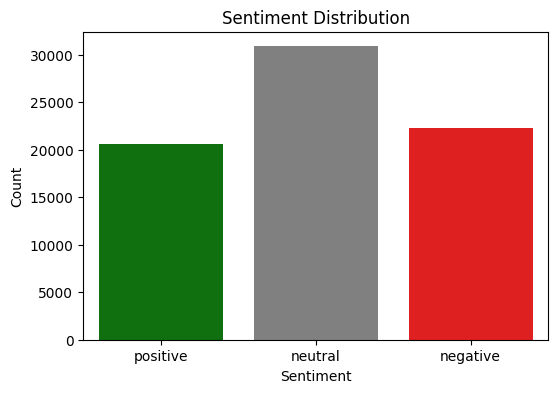

In [390]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=training_dataset, order=['positive','neutral','negative'],
              palette={'positive':'green','neutral':'gray','negative':'red'})
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

The dataset is slightly biased. The neutral sentiment has slightly higher representation than positive and negative.

**Modelling the data**

In [391]:
X_train = training_dataset['tweet']
Y_train = training_dataset['sentiment']

X_test = testing_dataset['tweet']
Y_test = testing_dataset['sentiment']

In [392]:
#converting text to numerical features using Tf-Idf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [393]:
#training the model
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

model = LinearSVC()
#model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train_tfidf, Y_train)

LinearSVC()

In [394]:
# Evaluating performance
from sklearn.metrics import classification_report, accuracy_score

Y_test_pred = model.predict(X_test_tfidf)
print("Test Accuracy:", str(accuracy_score(Y_test, Y_test_pred)*100)+"%")
print("\nClassification Report:\n", classification_report(Y_test, Y_test_pred))

Test Accuracy: 84.6%

Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.86      0.84       266
     neutral       0.87      0.85      0.86       457
    positive       0.83      0.83      0.83       277

    accuracy                           0.85      1000
   macro avg       0.84      0.85      0.84      1000
weighted avg       0.85      0.85      0.85      1000

